In [25]:
# Load Libraries
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot
print('loaded')

loaded


   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


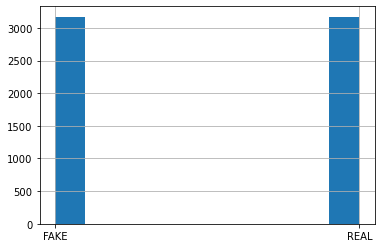

In [26]:
df = pd.read_csv('news.csv')
print(df.head())

labels = df['label']
labels.head()

#print(df.groupby(['label']).count())

labels.hist()
pyplot.show()


In [27]:
# Partition the data
X_train, X_validation, Y_train, Y_validation = train_test_split(df['text'], labels, test_size=0.20, random_state=1) # Split into test/validation data

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_validation = tfidf_vectorizer.transform(X_validation)

In [28]:
# Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,Y_train)

# Predict and calculate accuracy
Y_pred=pac.predict(tfidf_validation)
score=accuracy_score(Y_validation,Y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.16%


In [29]:
confusion_matrix(Y_validation,Y_pred, labels=['FAKE','REAL'])
# 610 true positives, 583 true negatives, 33 false positives, and 41 false negatives
print(classification_report(Y_validation, Y_pred))

              precision    recall  f1-score   support

        FAKE       0.95      0.94      0.94       651
        REAL       0.93      0.95      0.94       616

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [ ]:
#Lessons learned from this project
"""A TfidfVectorizerConvert a collection of raw documents (news) to a matrix of TF-IDF features.
it is the Equivalent to CountVectorizer followed by TfidfTransformer. The  CountVectorizer counts 
the number of words (term frequency), limits the vocabulary size, applies stop words, etc. Next, 
the TfidfTransformer adds weight to each word in the corpus. The tf–idf value increases proportionally
to the number of times a word appears in the document and is offset by the number of documents in the
corpus that contain the word. It is my understanding that we are then looking at what words are prominent in 
fake news and modeling off of that.""" 